In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 28.3 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from google.colab.patches import cv2_imshow
import cv2

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# load pretrained weight

# config = Cfg.load_config_from_name('vgg_seq2seq')
config = Cfg.load_config_from_name('vgg_transformer')
config['weights'] = '/content/drive/MyDrive/OCR/Weights/ocr/transformerocr.pth'

# set device to use cpu
config['device'] = 'cpu'
config['cnn']['pretrained']=True
config['predictor']['beamsearch']=True

detector = Predictor(config)

# path = '/content/drive/MyDrive/002d12b31d85b2dbeb94.jpg'
# img_cv2 = cv2.imread(path, cv2.IMREAD_UNCHANGED)

# img_pil = Image.fromarray(np.uint8(img_cv2)).convert('RGB')

# # Show image using cv2_imshow
# cv2_imshow(img_cv2)


Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:08<00:00, 64.0MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


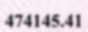

'24096.02'

In [10]:
path = '/content/drive/MyDrive/OCR/Dataset/gendata/img/train_float_102.png'
img_cv2 = cv2.imread(path, cv2.IMREAD_UNCHANGED)

img_pil = Image.fromarray(np.uint8(img_cv2)).convert('RGB')

cv2_imshow(img_cv2)
s = detector.predict(img_pil)
s